In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-classification-2/VGG19-20230524T150551Z-001/VGG19/checkpoint.data-00000-of-00001
/kaggle/input/flower-classification-2/VGG19-20230524T150551Z-001/VGG19/checkpoint.index
/kaggle/input/flower-classification-2/VGG19-20230524T150551Z-001/VGG19/checkpoint
/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50/fingerprint.pb
/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50/saved_model.pb
/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50/keras_metadata.pb
/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50/variables/variables.index
/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50/variables/variables.data-00000-of-00001
/kaggle/input/flower-classification-2/NN_Project_2_Data-20230524T113513Z-001/NN_Project_2_Data/Classes.txt
/kaggle/input/flower-classification-2/NN_Project_2_Data-20230524T113513Z-001/NN_Project_2_Data/test/garden phlox/ce9ec615a

In [72]:
import matplotlib.pyplot as plt
import warnings
from random import randint
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras import layers
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.applications.vgg19 import VGG19
from keras.applications import ResNet50
from random import randint
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import f1_score
import time
from collections import Counter
import numpy as np
import pandas as pd
from pandas import DataFrame
from keras.callbacks import EarlyStopping, ModelCheckpoint

tf.test.is_built_with_cuda()

True

In [73]:
train_dataset_path = r"/kaggle/input/flower-classification-2/NN_Project_2_Data-20230524T113513Z-001/NN_Project_2_Data/train"
test_dataset_path = r"/kaggle/input/flower-classification-2/NN_Project_2_Data-20230524T113513Z-001/NN_Project_2_Data/test"

batch_size = 32
img_width = img_height = 256

In [74]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

CLASSES.sort()
num_classes = len(CLASSES)
print(num_classes)

104


In [75]:
trainGenerator = ImageDataGenerator(
        rescale=1/255,          # Normalization )(between 0 , 1)
        validation_split=0.1,   # Validation Split (10%)
        rotation_range=20,      # randomly rotating the image by 30 degrees (agumentation)
        width_shift_range=0.2,  # shift the width of the image by 20% (agumentation)
        height_shift_range=0.2, # shift the height of the image by 20%  (agumentation)
        horizontal_flip=True    # randomly flip the image horizontally  (agumentation)
        )


In [76]:
testGenerator = ImageDataGenerator(
    rescale = 1/255             # Normalization
)

In [77]:
train_dataset = trainGenerator.flow_from_directory(train_dataset_path, batch_size=batch_size,target_size = (img_height, img_width), shuffle=True, class_mode='sparse',subset="training")
val_dataset = trainGenerator.flow_from_directory(train_dataset_path, batch_size=batch_size,target_size = (img_height,img_width), shuffle=True, class_mode='sparse',subset="validation")

Found 11541 images belonging to 104 classes.
Found 1231 images belonging to 104 classes.


In [78]:
test_dataset = testGenerator.flow_from_directory(test_dataset_path,target_size = (img_height,img_width), batch_size=batch_size, class_mode='sparse')

Found 3714 images belonging to 104 classes.


In [79]:
train_dataset.class_indices

{'alpine sea holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'balloon flower': 4,
 'barberton daisy': 5,
 'bee balm': 6,
 'bird of paradise': 7,
 'bishop of llandaff': 8,
 'black-eyed susan': 9,
 'blackberry lily': 10,
 'blanket flower': 11,
 'bolero deep blue': 12,
 'bougainvillea': 13,
 'bromelia': 14,
 'buttercup': 15,
 'californian poppy': 16,
 'camellia': 17,
 'canna lily': 18,
 'canterbury bells': 19,
 'cape flower': 20,
 'carnation': 21,
 'cautleya spicata': 22,
 'clematis': 23,
 'colt_s foot': 24,
 'columbine': 25,
 'common dandelion': 26,
 'common tulip': 27,
 'corn poppy': 28,
 'cosmos': 29,
 'cyclamen ': 30,
 'daffodil': 31,
 'daisy': 32,
 'desert-rose': 33,
 'fire lily': 34,
 'foxglove': 35,
 'frangipani': 36,
 'fritillary': 37,
 'garden phlox': 38,
 'gaura': 39,
 'gazania': 40,
 'geranium': 41,
 'giant white arum lily': 42,
 'globe thistle': 43,
 'globe-flower': 44,
 'grape hyacinth': 45,
 'great masterwort': 46,
 'hard-leaved pocket orchid': 47,
 'hibiscus': 4

In [80]:
trainCounter = Counter(train_dataset.classes)
valCounter = Counter(val_dataset.classes)
data= {
    "Samples in Train": trainCounter.values(),
    "Samples in Validation" : valCounter.values()
}

df = pd.DataFrame(data,index=CLASSES)

In [81]:
df

,Samples in Train,Samples in Validation
alpine sea holly,17,1
anthurium,107,11
artichoke,108,11
azalea,124,13
balloon flower,81,9
...,...,...
wild geranium,633,70
wild pansy,95,10
wild rose,669,74
windflower,234,26


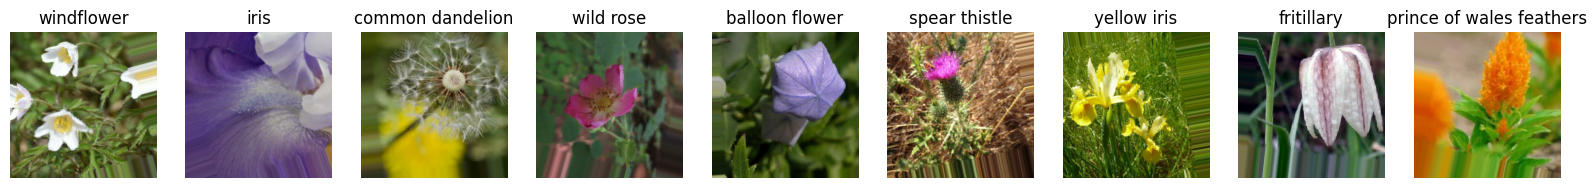

In [82]:
images, labels = train_dataset.next()

fig, axes = plt.subplots(figsize=(20,20), ncols=9)
for i in range(9):
    ax = axes[i]
    # label = np.argwhere(labels[i] == 1)[0][0]
    label = int(labels[i])
    title=CLASSES[label]
    ax.imshow(images[i])
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

In [83]:
def test(model,test_dataset):
  output, labels = [], []
  # Iterate over all test data
  while len(labels) != test_dataset.n:
    # Generate the next batch
    image_batch, label_batch = test_dataset.next()
    # Pass it to our model and add the result to our lists.
    
    batch_output = model.predict(image_batch, verbose=1)
    output.extend(batch_output)
    labels.extend(label_batch)
    
  # Convert the lists to numpy array to have access to methods
  # such as `shape`, `size`, etc. They are also shown in a nicer
  # way in the Jupyter console. Also, the labels are floats for
  # some reason, so we convert them to integers.
  return np.array(output), np.array(labels).astype(int)

In [84]:
def get_predicted_labels(output):
  """
  Returns the labels predicted by the model.

  Parameters:
  -----------
  output: The output returned from `model.predict()`.
  """
  # Replace each row with the index of the maximum value in that row.
  return np.argmax(output, axis=1)

In [104]:
def confusion_matrix(labels, predicted_labels):
  """
  Returns the confusion matrix of a model as a DataFrame.

  Parameters:
  -----------
  labels: The true labels.
  predicted_labels: The labels predicted by the model.
  """
  matrix = tf.math.confusion_matrix(
      labels=labels,
      predictions=predicted_labels,
      num_classes=len(CLASSES),
  )
  # We convert the matrix to a numpy array because tensorflow tensors
  # take up a lot of space when shown in the console. We also replace
  # the row and column indices with the class names.
  return pd.DataFrame(matrix.numpy(), columns=CLASSES, index=CLASSES)

In [86]:
def most_confusing_classes(count, f1_score):
    """
    Returns a list of the most confusing classes
    in the order of increasing F1 score.

    Parameters:
    -----------
    count: The number of classes to return.
    f1_score: The f1 score of each class.
    """
    sorted_labels = np.argsort(f1_score)[0 : count]
    return [ CLASSES[label] for label in sorted_labels ]

In [87]:
def plot_acc(history):
  plt.figure(figsize=(20,20))
  # Plotting the trainning and validation accuracy
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  
  # Plotting the trainning and validation loss
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

## Custom Model

In [37]:
my_model = Sequential([
    # -------------------- First Layer -----------------------------------------
    # Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(256, 256, 3)),
    # Conv2D(filters=16, kernel_size=3, activation='relu'),
    # MaxPool2D(pool_size=(2, 2)),
    # BatchNormalization(),
    
    # -------------------- Second Layer ----------------------------------------
    Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(256, 256, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),

    # ------------------- Third Layer ------------------------------------------
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    # -------------------- Fourth Layer ---------------------------------------
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),

    # --------------------- Fifth Layer ----------------------------------------
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    # -------------------- Output Layer ----------------------------------------
    Flatten(),
    Dropout(0.25),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

my_model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(
        learning_rate=1e-3,
         epsilon=0.1),
    metrics=['accuracy'])

In [38]:
# Load the previously saved weights from the drive
my_model.load_weights('/kaggle/working/Checkpoint/Custom_Model/checkpoint')

In [39]:
stop_early = EarlyStopping(
    patience=5,
    monitor='val_accuracy',
    restore_best_weights=True, # restore the model back to the best state
)

# After each poch, save the weights if they result in better accuracy.
save_weights_custom_model = ModelCheckpoint(
    filepath='/kaggle/working/Checkpoint/Custom_Model/checkpoint',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [40]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


In [42]:
custom_model_history = my_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[stop_early, save_weights_custom_model],
)

Epoch 1/10
361/361 [==============================] - 263s 727ms/step - loss: 0.5992 - accuracy: 0.8157 - val_loss: 1.7736 - val_accuracy: 0.5711
Epoch 2/10
361/361 [==============================] - 230s 637ms/step - loss: 0.6221 - accuracy: 0.8097 - val_loss: 1.7409 - val_accuracy: 0.6076
Epoch 3/10
361/361 [==============================] - 226s 627ms/step - loss: 0.6140 - accuracy: 0.8088 - val_loss: 1.8353 - val_accuracy: 0.5881
Epoch 4/10
361/361 [==============================] - 228s 631ms/step - loss: 0.5677 - accuracy: 0.8268 - val_loss: 1.7978 - val_accuracy: 0.6084
Epoch 5/10
361/361 [==============================] - 249s 690ms/step - loss: 0.5172 - accuracy: 0.8388 - val_loss: 1.7230 - val_accuracy: 0.5979
Epoch 6/10
361/361 [==============================] - 228s 630ms/step - loss: 0.5191 - accuracy: 0.8365 - val_loss: 1.7508 - val_accuracy: 0.6068
Epoch 7/10
361/361 [==============================] - 229s 633ms/step - loss: 0.5021 - accuracy: 0.8441 - val_loss: 1.7033 -

In [43]:
my_model.save("/kaggle/working/saved_models/custom_model")


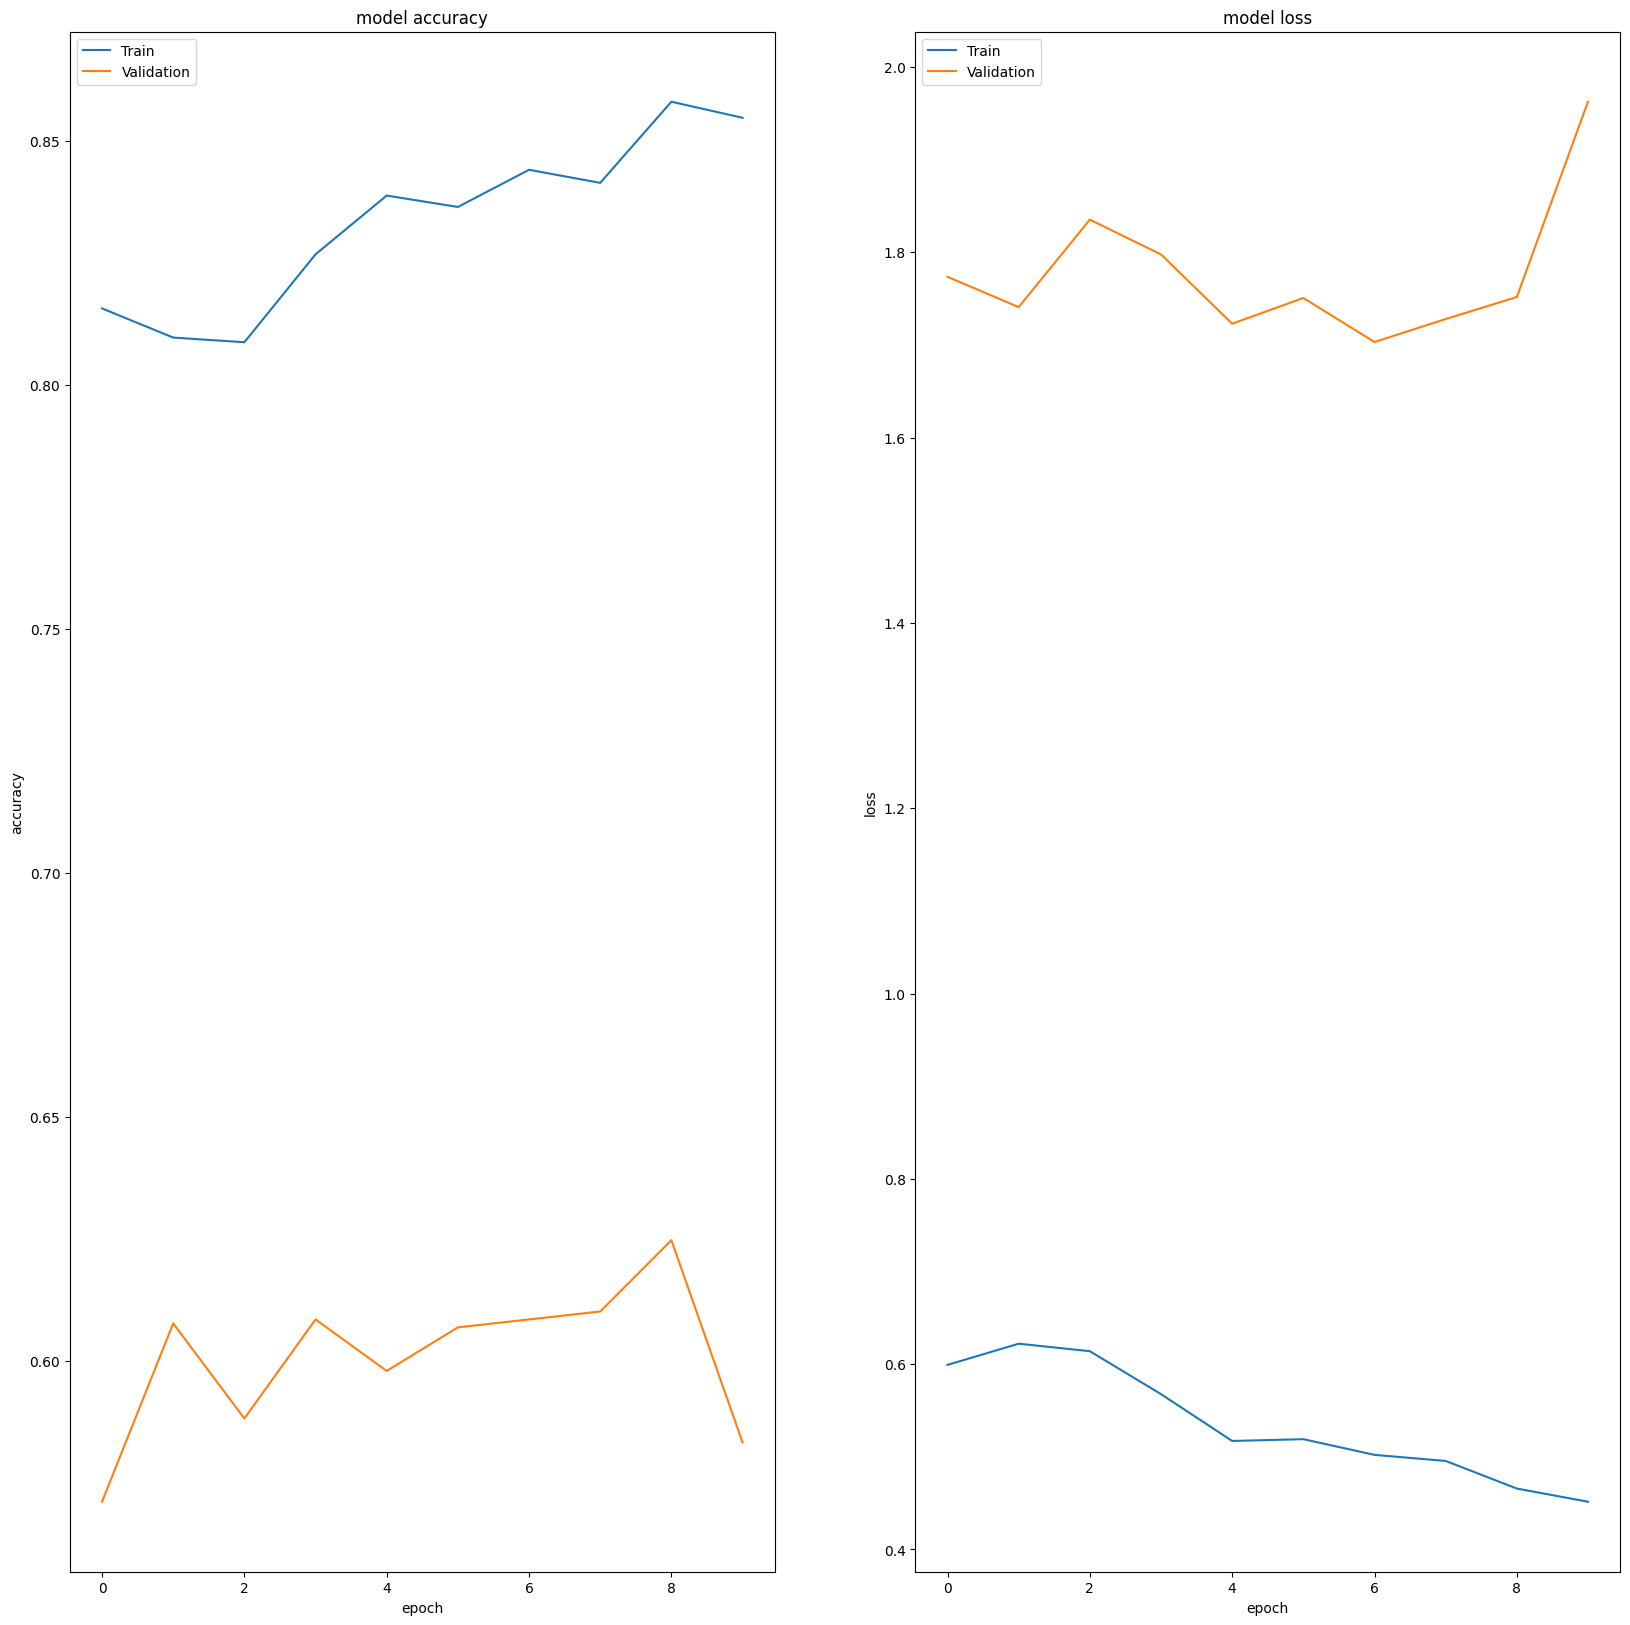

In [53]:
plot_acc(custom_model_history)

In [68]:
my_model.evaluate(test_dataset)

117/117 [==============================] - 15s 128ms/step - loss: 1.8574 - accuracy: 0.6107


[1.857431173324585, 0.6106623411178589]

In [88]:
output, labels = test(my_model,test_dataset)

1/1 [==============================] - 0s 25ms/step


In [89]:
predicted_labels = get_predicted_labels(output)
predicted_labels, predicted_labels.shape

(array([30, 50, 86, ..., 50, 78, 26]), (3714,))

In [105]:
confusion_matrix_custom_model = confusion_matrix(labels, predicted_labels)
confusion_matrix_custom_model

,alpine sea holly,anthurium,artichoke,azalea,balloon flower,barberton daisy,bee balm,bird of paradise,bishop of llandaff,black-eyed susan,...,tree poppy,trumpet creeper,wallflower,water lily,watercress,wild geranium,wild pansy,wild rose,windflower,yellow iris
alpine sea holly,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anthurium,0,10,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
artichoke,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,4,0,0
azalea,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
balloon flower,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wild geranium,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,8,9,0
wild pansy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,16,0,1,0
wild rose,0,0,0,1,0,0,0,0,0,0,...,2,1,0,0,0,20,0,132,10,0
windflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,4,34,1


In [91]:
f1_score_custom_model_macro = f1_score(labels, predicted_labels,average="macro")
f1_score_custom_model_macro

0.5673937719772529

In [92]:
f1_score_custom_model_none = f1_score(labels,predicted_labels,average=None)
f1_score_custom_model_none

array([0.5       , 0.29166667, 0.63492063, 0.3373494 , 0.38888889,
       0.51612903, 0.69230769, 0.84848485, 0.90322581, 0.64      ,
       0.72727273, 0.85714286, 0.        , 0.34951456, 0.48275862,
       0.67142857, 0.86486486, 0.43478261, 0.25      , 0.25      ,
       0.87179487, 0.18604651, 1.        , 0.36363636, 0.72727273,
       0.34042553, 0.70819672, 0.57272727, 0.54901961, 0.66666667,
       0.42758621, 0.35      , 0.69230769, 0.2962963 , 0.72727273,
       0.65714286, 0.64197531, 0.7826087 , 0.33333333, 0.70588235,
       0.55555556, 0.97297297, 0.625     , 0.7       , 0.22222222,
       0.51162791, 0.54545455, 0.72727273, 0.375     , 0.3255814 ,
       0.70753065, 0.66666667, 0.7755102 , 0.70588235, 0.81818182,
       0.66666667, 0.33333333, 0.54054054, 0.35714286, 0.64197531,
       0.5       , 0.56410256, 0.5       , 0.55900621, 0.95238095,
       1.        , 0.80645161, 0.42105263, 0.53658537, 0.54285714,
       0.76510067, 0.30769231, 0.96969697, 0.53846154, 0.41975

In [93]:
most_confusing_classes(count=6, f1_score=f1_score_custom_model_none)

['bolero deep blue',
 'sweet pea',
 'sword lily',
 'carnation',
 'spring crocus',
 'globe-flower']

## VGG19

In [55]:
vgg19 = Sequential([
    VGG19(include_top=False, weights=None, pooling='max', input_shape=(256, 256, 3)),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(104, activation='softmax'),
])

vgg19.compile(optimizer=Adam(learning_rate=1e-5),
              loss=SparseCategoricalCrossentropy(),
              metrics='accuracy')

In [56]:
vgg19.load_weights('/kaggle/input/flower-classification-2/VGG19-20230524T150551Z-001/VGG19/checkpoint')

In [57]:
vgg19_checkpoint = ModelCheckpoint(
    filepath='/kaggle/working/Checkpoint/VGG19/checkpoint',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [58]:
vgg19_history = vgg19.fit(train_dataset,
                          epochs=10,
                          validation_data=val_dataset,
                          callbacks=[vgg19_checkpoint, stop_early])

Epoch 1/10
361/361 [==============================] - 345s 917ms/step - loss: 1.1558 - accuracy: 0.6650 - val_loss: 1.8944 - val_accuracy: 0.5280
Epoch 2/10
361/361 [==============================] - 285s 789ms/step - loss: 1.1048 - accuracy: 0.6794 - val_loss: 1.8038 - val_accuracy: 0.5491
Epoch 3/10
361/361 [==============================] - 284s 787ms/step - loss: 1.0852 - accuracy: 0.6744 - val_loss: 1.7957 - val_accuracy: 0.5386
Epoch 4/10
361/361 [==============================] - 284s 786ms/step - loss: 1.0159 - accuracy: 0.6975 - val_loss: 1.9631 - val_accuracy: 0.5199
Epoch 5/10
361/361 [==============================] - 305s 845ms/step - loss: 1.0010 - accuracy: 0.7019 - val_loss: 1.8960 - val_accuracy: 0.5280
Epoch 6/10
361/361 [==============================] - 287s 794ms/step - loss: 0.9496 - accuracy: 0.7179 - val_loss: 1.7938 - val_accuracy: 0.5630
Epoch 7/10
361/361 [==============================] - 285s 790ms/step - loss: 0.9411 - accuracy: 0.7161 - val_loss: 1.8411 -

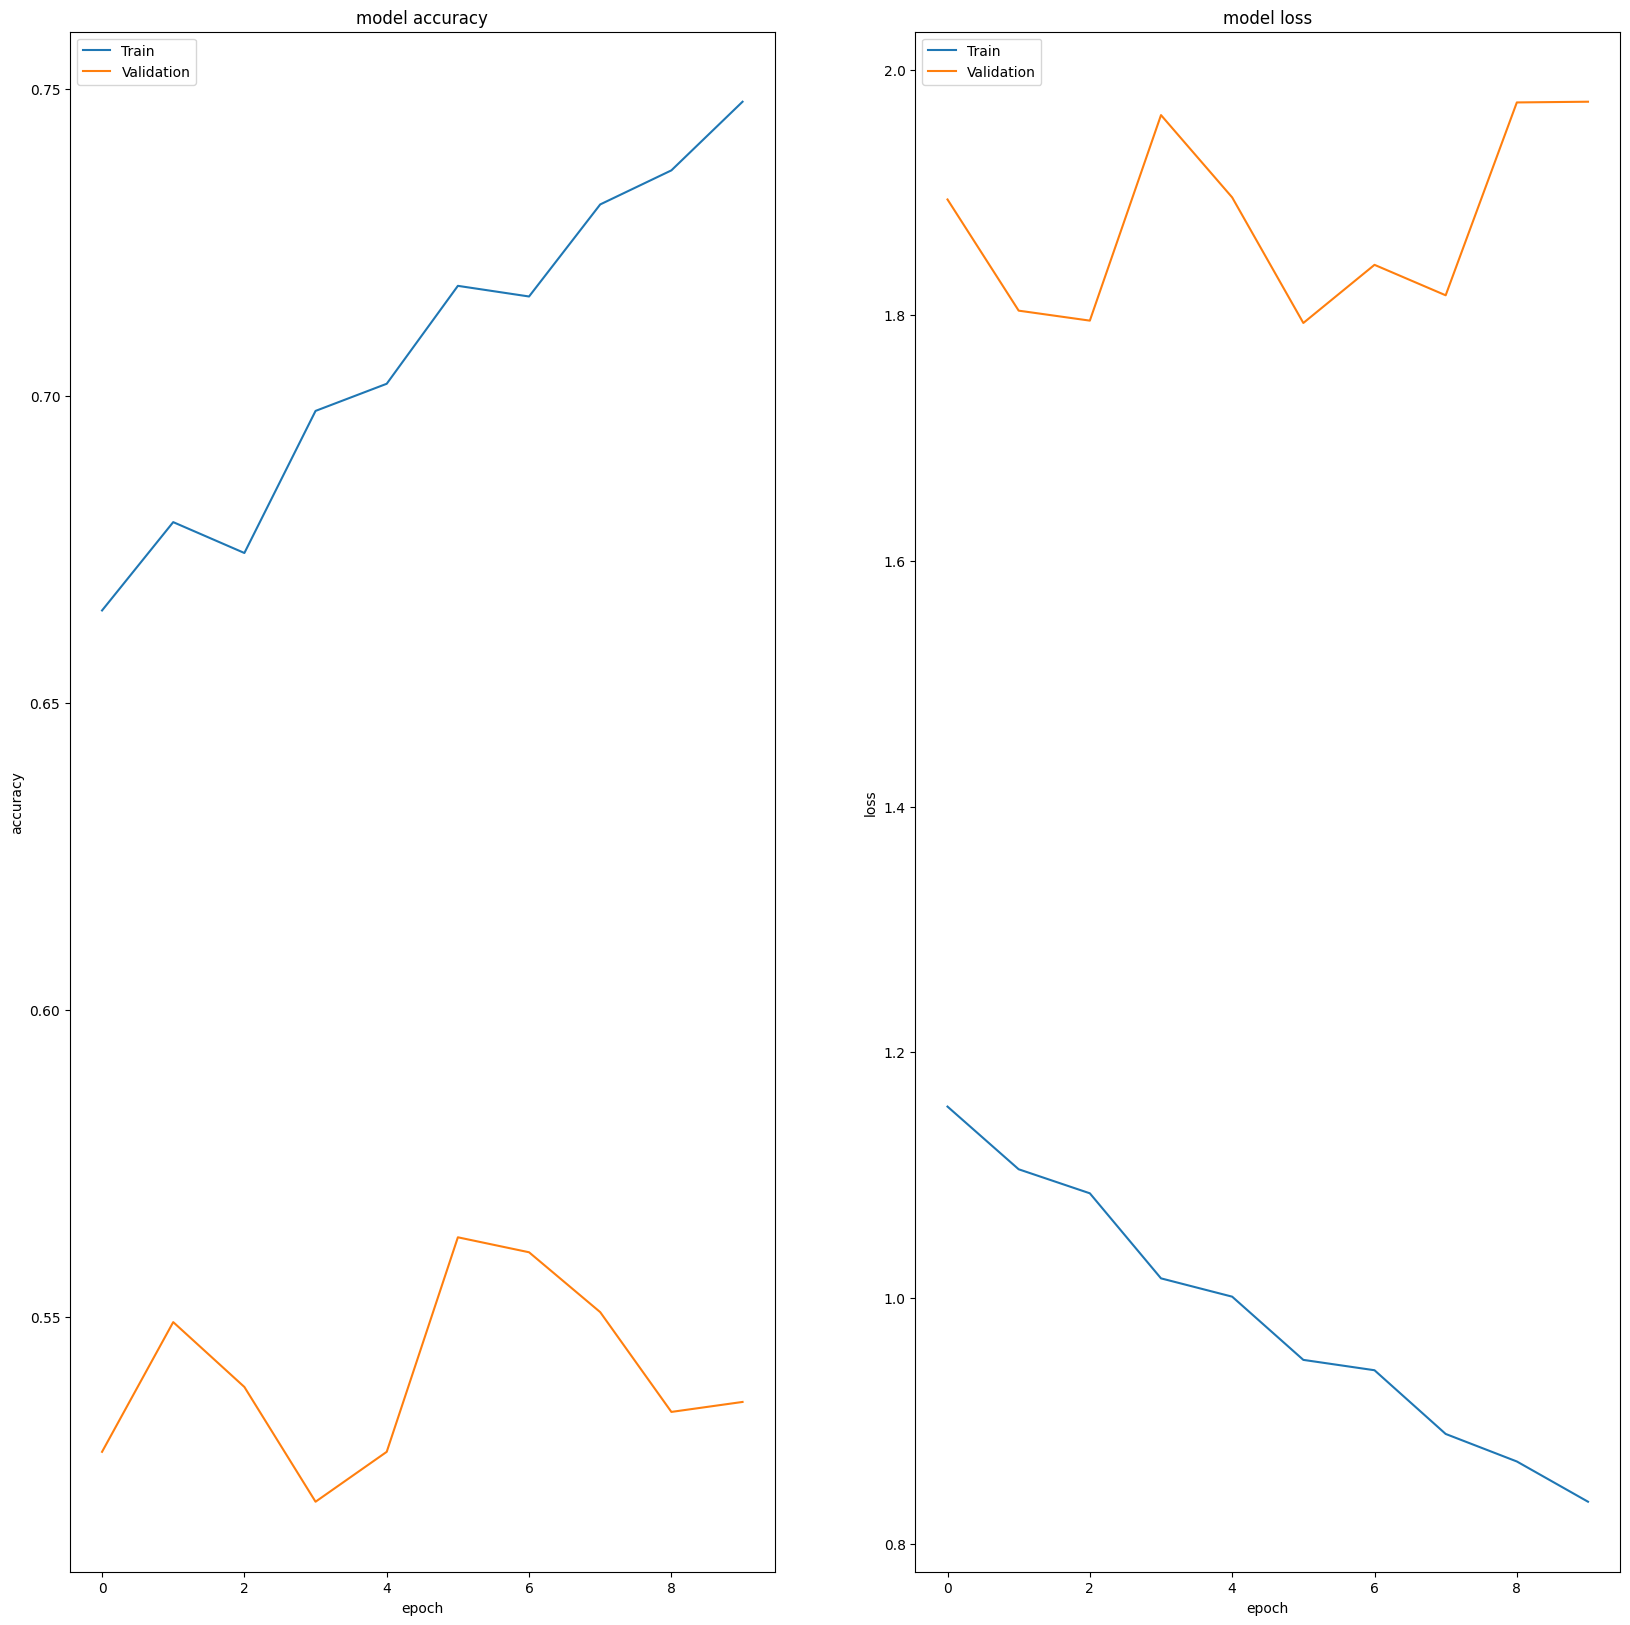

In [59]:
plot_acc(vgg19_history)

In [94]:
vgg19.evaluate(test_dataset)

117/117 [==============================] - 23s 197ms/step - loss: 1.9923 - accuracy: 0.5536


[1.9923036098480225, 0.5535810589790344]

In [95]:
output, labels = test(vgg19,test_dataset)

1/1 [==============================] - 0s 24ms/step


In [98]:
predicted_labels = get_predicted_labels(output)
predicted_labels, predicted_labels.shape

(array([102,  92,  21, ...,  88,  99,  74]), (3714,))

In [106]:
confusion_matrix_vgg = confusion_matrix(labels, predicted_labels)
confusion_matrix_vgg

,alpine sea holly,anthurium,artichoke,azalea,balloon flower,barberton daisy,bee balm,bird of paradise,bishop of llandaff,black-eyed susan,...,tree poppy,trumpet creeper,wallflower,water lily,watercress,wild geranium,wild pansy,wild rose,windflower,yellow iris
alpine sea holly,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anthurium,0,10,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
artichoke,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,4,0,0
azalea,0,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
balloon flower,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wild geranium,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,8,9,0
wild pansy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,16,0,1,0
wild rose,0,0,0,1,0,0,0,0,0,0,...,2,1,0,0,0,20,0,132,10,0
windflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,4,34,1


In [107]:
f1_score_vgg_macro = f1_score(labels, predicted_labels,average="macro")
f1_score_vgg_macro

0.5126077829165735

In [108]:
f1_score_vgg_none = f1_score(labels,predicted_labels,average=None)
f1_score_vgg_none

array([0.4       , 0.35087719, 0.47272727, 0.45333333, 0.22857143,
       0.42857143, 0.34042553, 0.78125   , 0.82352941, 0.60465116,
       0.54545455, 0.82352941, 0.        , 0.37735849, 0.5       ,
       0.58937198, 0.96774194, 0.20689655, 0.36842105, 0.        ,
       0.86666667, 0.33846154, 0.88888889, 0.3255814 , 0.71428571,
       0.38709677, 0.66875   , 0.47826087, 0.49275362, 0.36363636,
       0.57777778, 0.40816327, 0.55345912, 0.57142857, 0.76923077,
       0.57575758, 0.65217391, 0.44444444, 0.30769231, 0.57692308,
       0.43478261, 0.89473684, 0.42857143, 0.53658537, 0.5       ,
       0.35897436, 0.46153846, 0.61538462, 0.39215686, 0.30769231,
       0.71570577, 0.5       , 0.75      , 0.52941176, 0.95238095,
       0.58666667, 0.        , 0.42222222, 0.31578947, 0.49411765,
       0.42105263, 0.46666667, 0.        , 0.67973856, 0.85714286,
       0.82352941, 0.69565217, 0.26666667, 0.37113402, 0.42666667,
       0.68531469, 0.61538462, 0.96969697, 0.46153846, 0.35897

In [110]:
most_confusing_classes(count=3, f1_score=f1_score_vgg_none)

['sweet pea', 'love in the mist', 'canterbury bells']

In [111]:
vgg19.save('/kaggle/working/saved_models/vgg19')

# RESNET

In [112]:
resnet50 = Sequential([
    ResNet50(include_top=False, weights=None, pooling='max'),
    Dense(104, activation='softmax')
])

resnet50.compile(optimizer=Adam(learning_rate=0.001),
                 loss=SparseCategoricalCrossentropy(),
                 metrics='accuracy')

In [117]:
resnet50 = tf.keras.models.load_model('/kaggle/input/flower-classification-2/resnet50-20230524T161103Z-001/resnet50')

In [119]:
save_weights_resnetpre = ModelCheckpoint(
    filepath='/kaggle/working/resnet/checkpoint_resnetpre',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

resnet50_history = resnet50.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  
    callbacks=[save_weights_resnetpre]
)

Epoch 1/10
361/361 [==============================] - 304s 819ms/step - loss: 0.7676 - accuracy: 0.7690 - val_loss: 10.4815 - val_accuracy: 0.5459
Epoch 2/10
361/361 [==============================] - 267s 739ms/step - loss: 0.6861 - accuracy: 0.7916 - val_loss: 1.4817 - val_accuracy: 0.6450
Epoch 3/10
361/361 [==============================] - 263s 728ms/step - loss: 0.6409 - accuracy: 0.8010 - val_loss: 2.0460 - val_accuracy: 0.5426
Epoch 4/10
361/361 [==============================] - 266s 738ms/step - loss: 0.6377 - accuracy: 0.8020 - val_loss: 2.9504 - val_accuracy: 0.5613
Epoch 5/10
361/361 [==============================] - 268s 742ms/step - loss: 0.5449 - accuracy: 0.8301 - val_loss: 2.2087 - val_accuracy: 0.6669
Epoch 6/10
361/361 [==============================] - 266s 736ms/step - loss: 0.5040 - accuracy: 0.8412 - val_loss: 8.1746 - val_accuracy: 0.6214
Epoch 7/10
361/361 [==============================] - 264s 731ms/step - loss: 0.4869 - accuracy: 0.8466 - val_loss: 9.4593 

In [120]:
resnet50.evaluate(test_dataset)

117/117 [==============================] - 30s 252ms/step - loss: 4.6203 - accuracy: 0.6465


[4.620321750640869, 0.6464728116989136]

In [121]:
output, labels = test(resnet50,test_dataset)

1/1 [==============================] - 1s 958ms/step


In [122]:
predicted_labels = get_predicted_labels(output)
predicted_labels, predicted_labels.shape

(array([101, 102,  50, ...,  55,  57,   5]), (3714,))

In [123]:
confusion_matrix_resnet = confusion_matrix(labels, predicted_labels)
confusion_matrix_resnet

,alpine sea holly,anthurium,artichoke,azalea,balloon flower,barberton daisy,bee balm,bird of paradise,bishop of llandaff,black-eyed susan,...,tree poppy,trumpet creeper,wallflower,water lily,watercress,wild geranium,wild pansy,wild rose,windflower,yellow iris
alpine sea holly,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anthurium,0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artichoke,0,0,17,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,1,1
azalea,0,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
balloon flower,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wild geranium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,129,0,40,12,1
wild pansy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,3,0,0
wild rose,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,2,0,183,7,1
windflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,12,49,0


In [124]:
f1_score_resnet_macro = f1_score(labels, predicted_labels,average="macro")
f1_score_resnet_macro

0.6330710116096685

In [125]:
f1_score_resnet_none = f1_score(labels,predicted_labels,average=None)
f1_score_resnet_none

array([0.57142857, 0.42424242, 0.61818182, 0.55696203, 0.07142857,
       0.73333333, 0.46808511, 0.83636364, 0.94117647, 0.59375   ,
       0.83333333, 1.        , 0.5       , 0.53125   , 0.82352941,
       0.56410256, 0.82051282, 0.56790123, 0.35294118, 0.25      ,
       0.96969697, 0.35616438, 1.        , 0.56      , 0.72727273,
       0.42857143, 0.71621622, 0.54205607, 0.74074074, 0.8       ,
       0.62921348, 0.47761194, 0.68525896, 0.47619048, 0.83333333,
       0.72941176, 0.71910112, 0.63636364, 0.33333333, 0.76595745,
       0.51351351, 1.        , 0.47058824, 0.875     , 0.5       ,
       0.35294118, 0.66666667, 0.72727273, 0.57142857, 0.64285714,
       0.74952199, 0.76923077, 0.82352941, 0.78947368, 0.90909091,
       0.63888889, 0.66666667, 0.43478261, 0.45833333, 0.60606061,
       0.5       , 0.58536585, 0.57142857, 0.61870504, 0.94736842,
       1.        , 0.8       , 0.73333333, 0.62745098, 0.57142857,
       0.83435583, 0.66666667, 1.        , 0.55384615, 0.31775

In [126]:
most_confusing_classes(count=3, f1_score=f1_score_resnet_none)

['sweet pea', 'siam tulip', 'balloon flower']

In [127]:
resnet50.save('/kaggle/working/saved_models/resnet')

## GooLeNet (InceptionV3) - Transfer Learning

In [145]:
googlenet = Sequential([
    tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', pooling='max'),
    Dense(104, activation='softmax')
])

googlenet.compile(optimizer=Adam(learning_rate=0.001),
                 loss=SparseCategoricalCrossentropy(),
                 metrics='accuracy')

In [147]:
save_weights_googlenet = ModelCheckpoint(
    filepath='/kaggle/working/googlenet/checkpoint_googlenet',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
)

In [163]:
googlenet_history = googlenet.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  
    callbacks=[save_weights_googlenet]
)

Epoch 1/10
361/361 [==============================] - 258s 713ms/step - loss: 0.4696 - accuracy: 0.8556 - val_loss: 1.0073 - val_accuracy: 0.7547
Epoch 2/10
361/361 [==============================] - 251s 694ms/step - loss: 0.4503 - accuracy: 0.8669 - val_loss: 1.3292 - val_accuracy: 0.6864
Epoch 3/10
361/361 [==============================] - 255s 707ms/step - loss: 0.4430 - accuracy: 0.8704 - val_loss: 1.1098 - val_accuracy: 0.7165
Epoch 4/10
361/361 [==============================] - 253s 700ms/step - loss: 0.3748 - accuracy: 0.8843 - val_loss: 1.1973 - val_accuracy: 0.7490
Epoch 5/10
361/361 [==============================] - 253s 699ms/step - loss: 0.3863 - accuracy: 0.8842 - val_loss: 1.3305 - val_accuracy: 0.6978
Epoch 6/10
361/361 [==============================] - 250s 691ms/step - loss: 0.3695 - accuracy: 0.8861 - val_loss: 1.7791 - val_accuracy: 0.6783
Epoch 7/10
361/361 [==============================] - 255s 707ms/step - loss: 0.3856 - accuracy: 0.8855 - val_loss: 3.8037 -

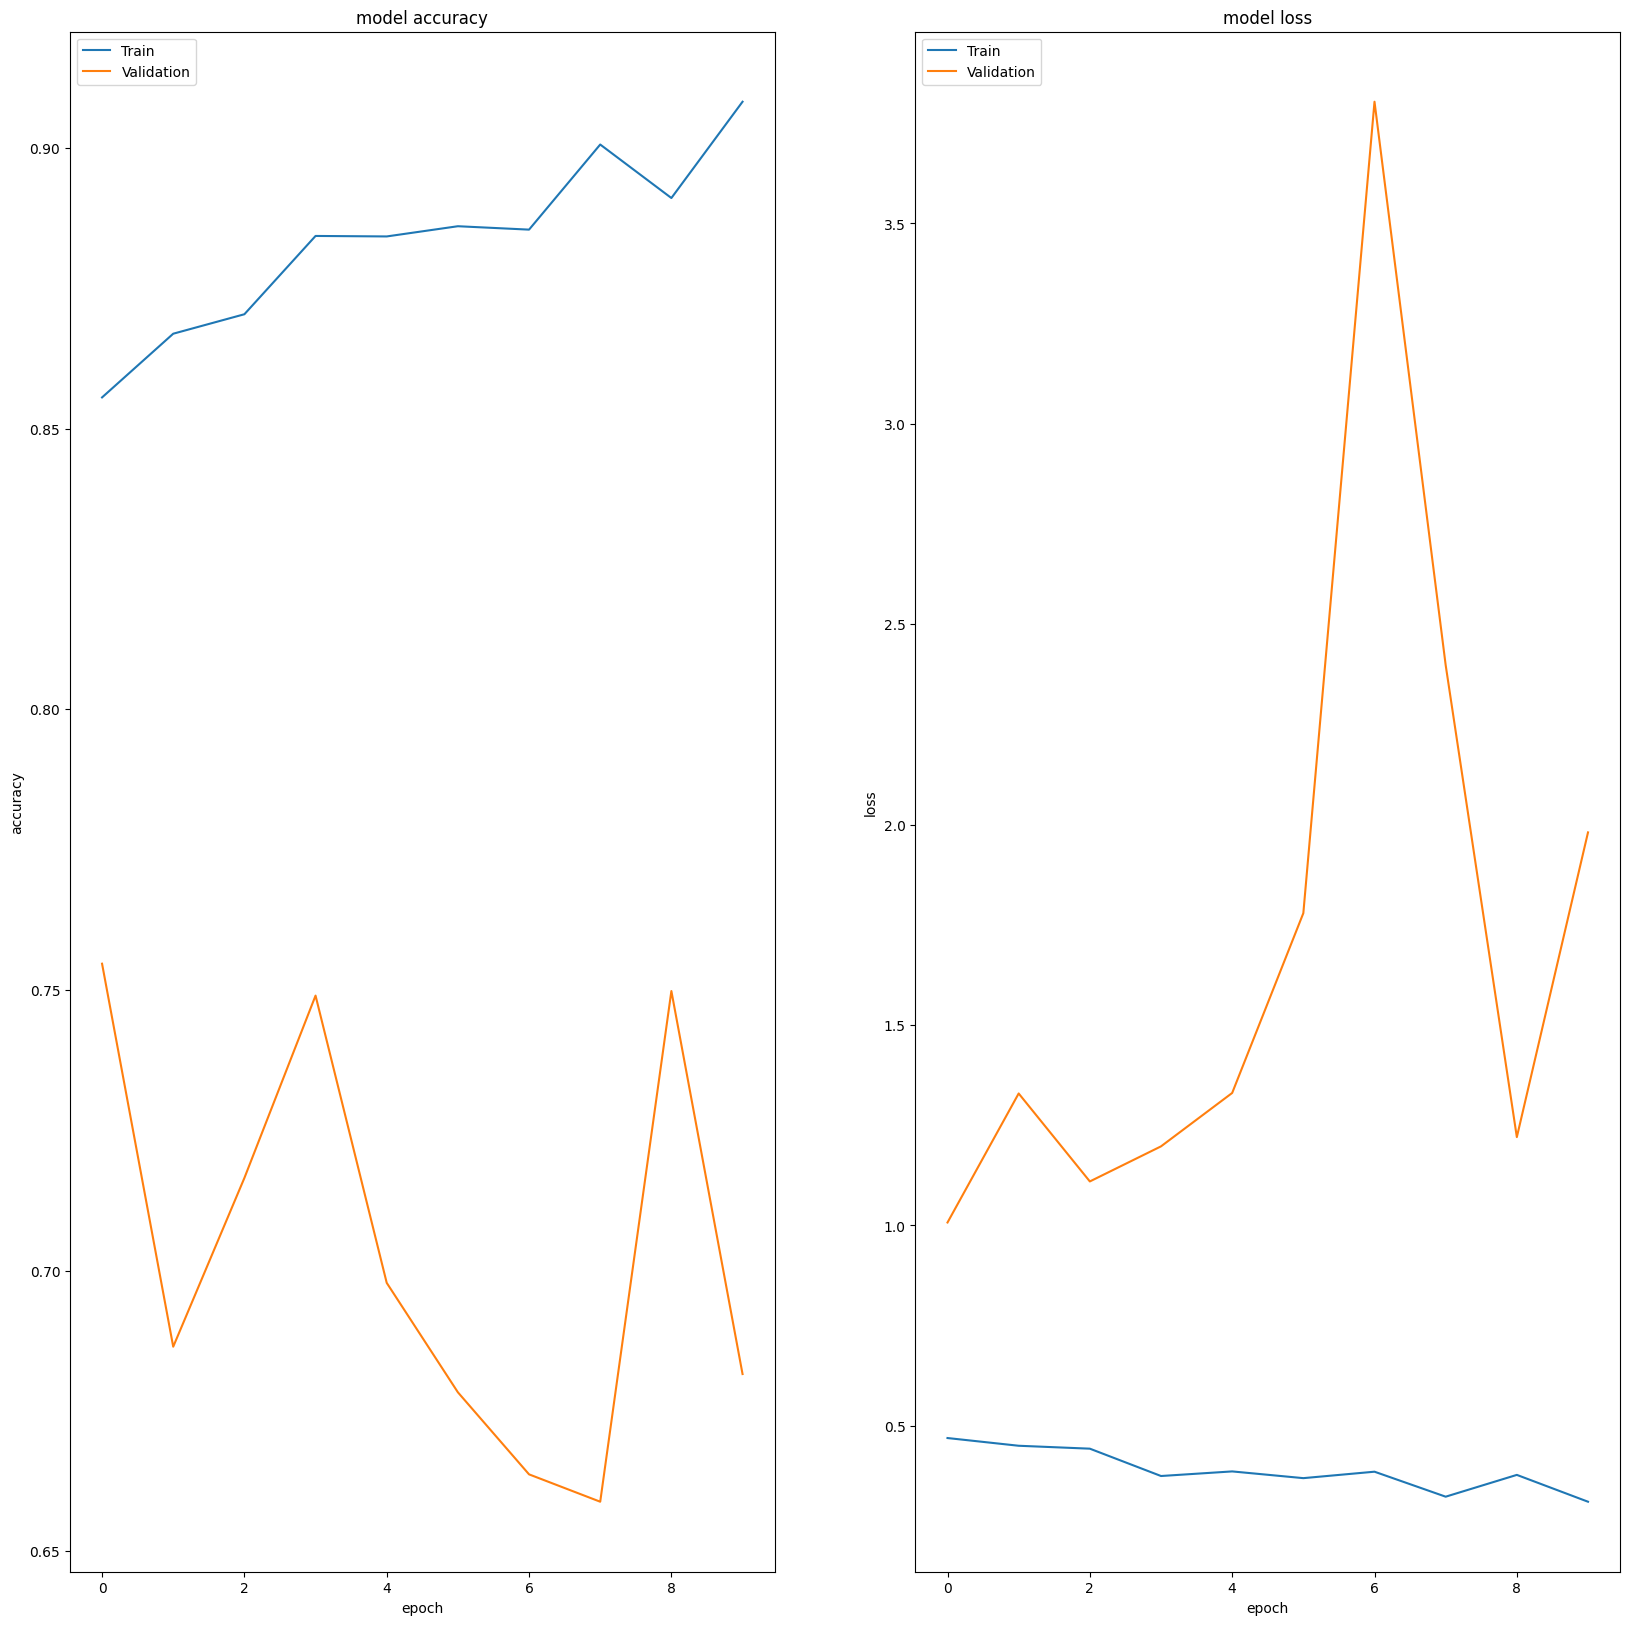

In [164]:
plot_acc(googlenet_history)

In [150]:
googlenet_history_2 = googlenet.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  
    callbacks=[save_weights_googlenet]
)

Epoch 1/20
361/361 [==============================] - 254s 704ms/step - loss: 1.6920 - accuracy: 0.5515 - val_loss: 9.4834 - val_accuracy: 0.3794
Epoch 2/20
361/361 [==============================] - 252s 698ms/step - loss: 1.5988 - accuracy: 0.5761 - val_loss: 3.1941 - val_accuracy: 0.5313
Epoch 3/20
361/361 [==============================] - 254s 702ms/step - loss: 1.3664 - accuracy: 0.6269 - val_loss: 6.3371 - val_accuracy: 0.6231
Epoch 4/20
361/361 [==============================] - 252s 698ms/step - loss: 1.2650 - accuracy: 0.6549 - val_loss: 1.8532 - val_accuracy: 0.6377
Epoch 5/20
361/361 [==============================] - 257s 711ms/step - loss: 1.1523 - accuracy: 0.6832 - val_loss: 1.4218 - val_accuracy: 0.6312
Epoch 6/20
361/361 [==============================] - 255s 705ms/step - loss: 1.0865 - accuracy: 0.7017 - val_loss: 1.6255 - val_accuracy: 0.6109
Epoch 7/20
361/361 [==============================] - 253s 700ms/step - loss: 1.0353 - accuracy: 0.7064 - val_loss: 6.8954 -

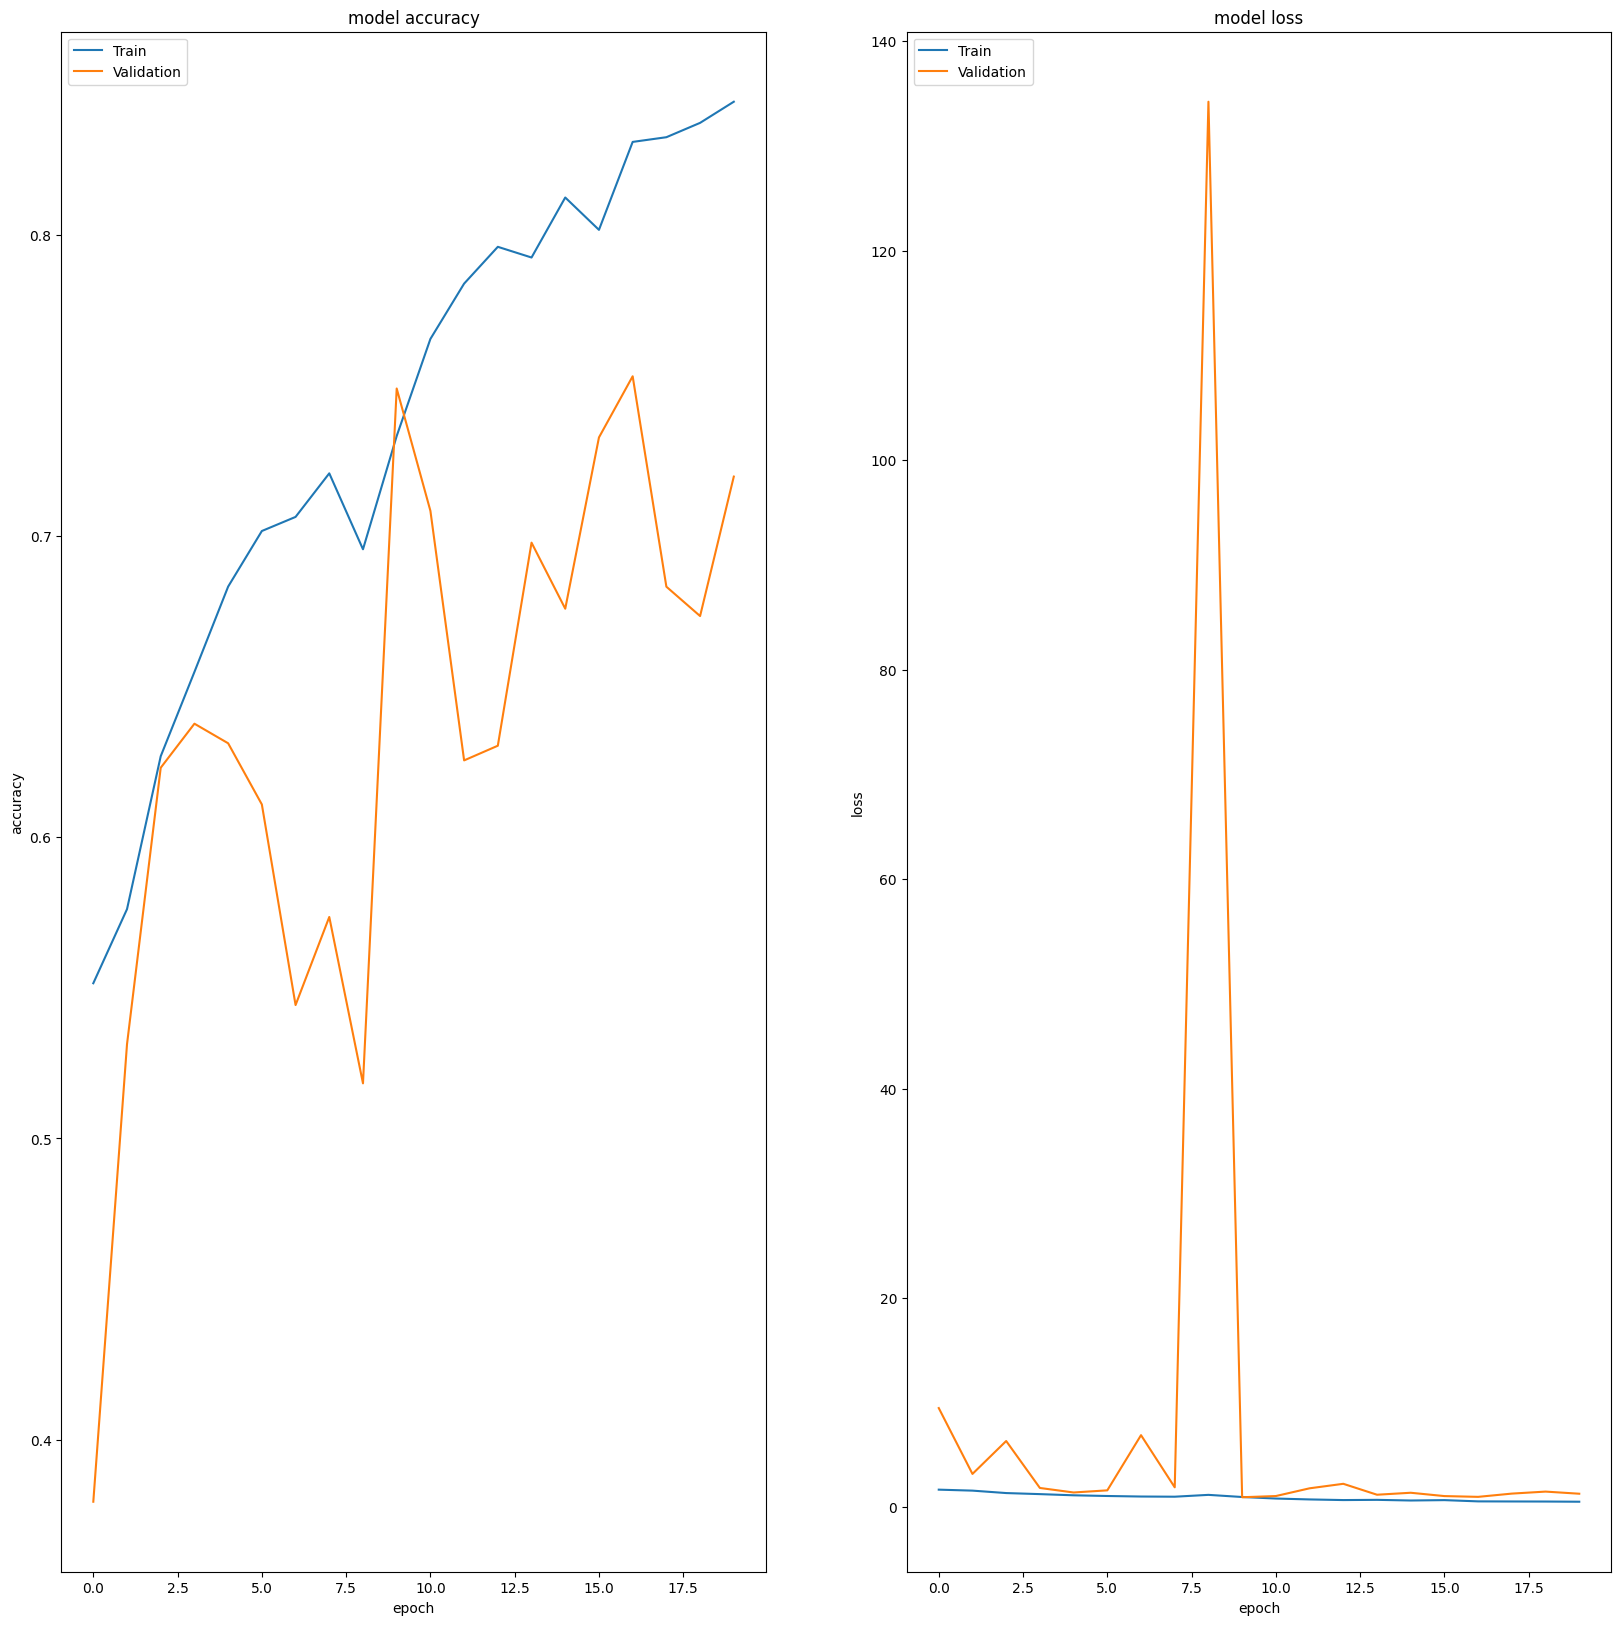

In [153]:
plot_acc(googlenet_history_2)

In [152]:
googlenet.evaluate(test_dataset)

117/117 [==============================] - 21s 181ms/step - loss: 1.7586 - accuracy: 0.6998


[1.7585930824279785, 0.6997845768928528]

In [165]:
googlenet.save('/kaggle/working/saved_models/googlenet')

In [154]:
output, labels = test(googlenet,test_dataset)

1/1 [==============================] - 1s 1s/step


In [155]:
predicted_labels = get_predicted_labels(output)
predicted_labels, predicted_labels.shape

(array([59, 99, 17, ..., 17, 68, 26]), (3714,))

In [156]:
confusion_matrix_googlenet = confusion_matrix(labels, predicted_labels)
confusion_matrix_googlenet

,alpine sea holly,anthurium,artichoke,azalea,balloon flower,barberton daisy,bee balm,bird of paradise,bishop of llandaff,black-eyed susan,...,tree poppy,trumpet creeper,wallflower,water lily,watercress,wild geranium,wild pansy,wild rose,windflower,yellow iris
alpine sea holly,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anthurium,0,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artichoke,0,0,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
azalea,0,1,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
balloon flower,0,0,0,0,15,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wild geranium,0,0,1,0,3,0,1,0,0,0,...,0,0,0,0,0,170,0,0,3,0
wild pansy,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,26,0,0,0
wild rose,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,3,0,170,10,1
windflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,2,55,0


In [160]:
f1_score_googlenet_macro = f1_score(labels, predicted_labels,average="macro")
f1_score_googlenet_macro

0.6567652507741383

In [161]:
f1_score_googlenet_none = f1_score(labels,predicted_labels,average=None)
f1_score_googlenet_none

array([1.        , 0.48148148, 0.67857143, 0.48275862, 0.57692308,
       0.62962963, 0.71604938, 0.9       , 0.94117647, 0.4742268 ,
       0.44444444, 0.72727273, 0.44444444, 0.62686567, 0.84210526,
       0.80821918, 0.85714286, 0.52830189, 0.69230769, 0.        ,
       0.90909091, 0.38095238, 0.88888889, 0.55555556, 0.55555556,
       0.58823529, 0.77142857, 0.53548387, 0.56338028, 0.28571429,
       0.73529412, 0.61363636, 0.78111588, 0.71428571, 0.90909091,
       0.76404494, 0.65671642, 0.84848485, 0.6       , 0.78431373,
       0.54545455, 0.9       , 0.71428571, 0.60273973, 0.2       ,
       0.48979592, 0.61538462, 0.66666667, 0.60215054, 0.74193548,
       0.8377193 , 0.4       , 0.89795918, 0.77777778, 0.84210526,
       0.71794872, 0.6       , 0.55913978, 0.60714286, 0.44897959,
       0.        , 0.46315789, 0.88888889, 0.76821192, 0.77777778,
       0.94736842, 0.90625   , 0.66666667, 0.46575342, 0.70833333,
       0.88888889, 0.8       , 1.        , 0.57831325, 0.3    

In [162]:
most_confusing_classes(count=3, f1_score=f1_score_googlenet_none)

['siam tulip', 'mexican petunia', 'sweet pea']